##  Data Description
# 
##### The dataset `american_bankruptcy.csv` contains information on American companies. It includes various financial indicators used to predict the likelihood of bankruptcy.  
# 

In [2]:
## Import necessary libraries for data handling, visualization, and modeling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Set a simple plotting style
plt.style.use('default')


In [3]:
# For displaying all columns in the notebook output
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.4f}')

# Define the file path (using a raw string to avoid backslash issues)
file_path = r"C:\Users\Sima\Company-Bankruptcy-Prediction\american_bankruptcy.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows
print("Data Shape:", df.shape)
df.head()


Data Shape: (78682, 21)


,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.2670,833.1070,18.3730,89.0310,336.0180,35.1630,128.3480,372.7519,"1,024.3330",740.9980,180.4470,70.6580,191.2260,163.8160,201.0260,"1,024.3330",401.4830,935.3020
1,C_1,alive,2000,485.8560,713.8110,18.5770,64.3670,320.5900,18.5310,115.1870,377.1180,874.2550,701.8540,179.9870,45.7900,160.4440,125.3920,204.0650,874.2550,361.6420,809.8880
2,C_1,alive,2001,436.6560,526.4770,22.4960,27.2070,286.5880,-58.9390,77.5280,364.5928,638.7210,710.1990,217.6990,4.7110,112.2440,150.4640,139.6030,638.7210,399.9640,611.5140
3,C_1,alive,2002,396.4120,496.7470,27.1720,30.7450,259.9540,-12.4100,66.3220,143.3295,606.3370,686.6210,164.6580,3.5730,109.5900,203.5750,124.1060,606.3370,391.6330,575.5920
4,C_1,alive,2003,432.2040,523.3020,26.6800,47.4910,247.2450,3.5040,104.6610,308.9071,651.9580,709.2920,248.6660,20.8110,128.6560,131.2610,131.8840,651.9580,407.6080,604.4670


In [4]:
# Check the column names and data types
print("Column Names:", df.columns.tolist())
print("\nData Types:")
display(df.dtypes)


Column Names: ['company_name', 'status_label', 'year', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']

Data Types:


company_name     object
status_label     object
year              int64
X1              float64
X2              float64
X3              float64
X4              float64
X5              float64
X6              float64
X7              float64
X8              float64
X9              float64
X10             float64
X11             float64
X12             float64
X13             float64
X14             float64
X15             float64
X16             float64
X17             float64
X18             float64
dtype: object

In [5]:
# Count the number of unique companies in the dataset
num_unique_companies = df['company_name'].nunique()

print("Number of unique companies in the dataset:", num_unique_companies)

Number of unique companies in the dataset: 8971


### Exploratory Data Analysis (EDA)
# 
#### In this section, we:
#### - Display summary statistics.
#### - Check for missing values.
#### - Visualize distributions of numeric features.
#### - Plot a correlation matrix to examine relationships between features.


In [7]:
# Display summary statistics for numerical features
print("Summary Statistics:")
print(df.describe())

# Check for missing values across the dataset
print("\nMissing values per column:")
print(df.isnull().sum())


Summary Statistics:
             year           X1           X2          X3           X4  \
count 78,682.0000  78,682.0000  78,682.0000 78,682.0000  78,682.0000   
mean   2,007.5063     880.3625   1,594.5290    121.2343     376.7594   
std        5.7428   3,928.5648   8,930.4847    652.3768   2,012.0231   
min    1,999.0000      -7.7600    -366.6450      0.0000 -21,913.0000   
25%    2,002.0000      18.9240      17.0383      1.1920      -0.8110   
50%    2,007.0000     100.4495     103.6610      7.9295      15.0345   
75%    2,012.0000     431.5267     634.5480     47.9718     139.6552   
max    2,018.0000 169,662.0000 374,623.0000 28,430.0000  81,730.0000   

               X5           X6          X7             X8           X9  \
count 78,682.0000  78,682.0000 78,682.0000    78,682.0000  78,682.0000   
mean     201.6057     129.3825    286.8327     3,414.3546   2,364.0197   
std    1,060.7661   1,265.5320  1,335.9786    18,414.1036  11,950.0688   
min        0.0000 -98,696.0000     

In [8]:
# Display summary statistics for numerical columns
print("Statistical Summary (Numerical):")
display(df.describe())


Statistical Summary (Numerical):


,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
count,"78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000","78,682.0000"
mean,"2,007.5063",880.3625,"1,594.5290",121.2343,376.7594,201.6057,129.3825,286.8327,"3,414.3546","2,364.0197","2,867.1106",722.4837,255.5250,769.4908,610.0723,532.4671,"2,364.0197","1,773.5640","1,987.2603"
std,5.7428,"3,928.5648","8,930.4847",652.3768,"2,012.0231","1,060.7661","1,265.5320","1,335.9786","18,414.1036","11,950.0688","12,917.9444","3,242.1709","1,494.6435","3,774.7031","2,938.3874","6,369.1594","11,950.0688","8,053.6849","10,419.6290"
min,"1,999.0000",-7.7600,-366.6450,0.0000,"-21,913.0000",0.0000,"-98,696.0000",-0.0060,0.0001,"-1,964.9990",0.0010,-0.0230,"-25,913.0000","-21,536.0000",0.0010,"-102,362.0000","-1,964.9990",0.0010,-317.1970
25%,"2,002.0000",18.9240,17.0383,1.1920,-0.8110,0.0000,-7.4158,3.2812,34.9800,27.5485,37.3635,0.0000,-2.7870,8.5213,8.8893,-68.2827,27.5485,13.4860,32.8725
50%,"2,007.0000",100.4495,103.6610,7.9295,15.0345,7.0230,1.6160,22.8200,227.5118,186.5985,213.2035,7.5935,6.5180,63.5815,43.3330,-1.1310,186.5985,81.9880,168.9120
75%,"2,012.0000",431.5267,634.5480,47.9718,139.6552,74.7473,40.1442,131.5805,"1,244.8899","1,046.4025","1,171.3648",248.7608,87.5990,344.0743,222.8170,146.0700,"1,046.4025",629.9750,875.5222
max,"2,018.0000","169,662.0000","374,623.0000","28,430.0000","81,730.0000","62,567.0000","104,821.0000","65,812.0000","1,073,390.5400","511,729.0000","531,864.0000","166,250.0000","71,230.0000","137,106.0000","116,866.0000","402,089.0000","511,729.0000","337,980.0000","481,580.0000"


### Visualizations: Distribution and Correlation
# 
##### We'll create histograms for each numeric feature to examine their distributions and plot a correlation matrix.


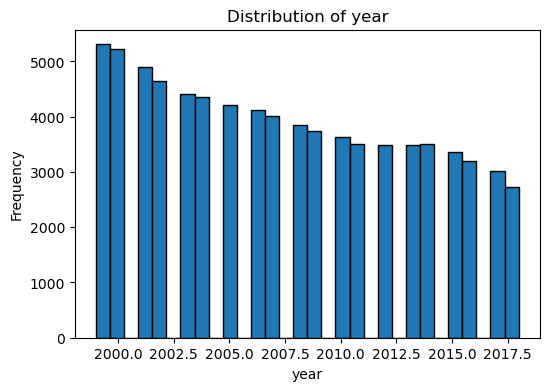

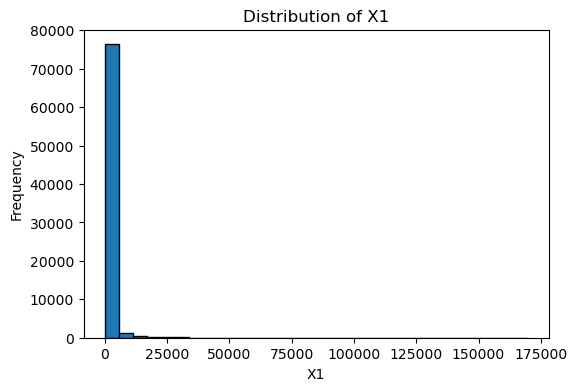

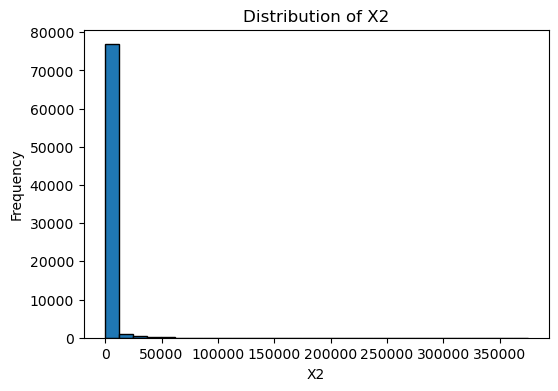

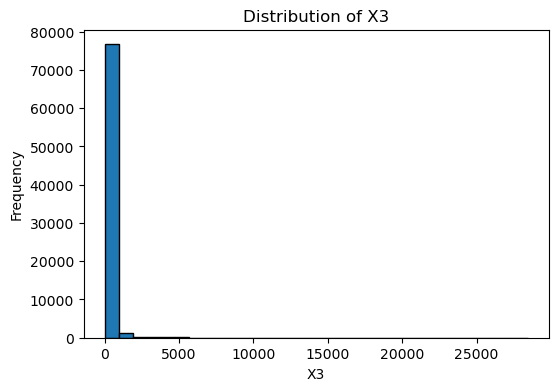

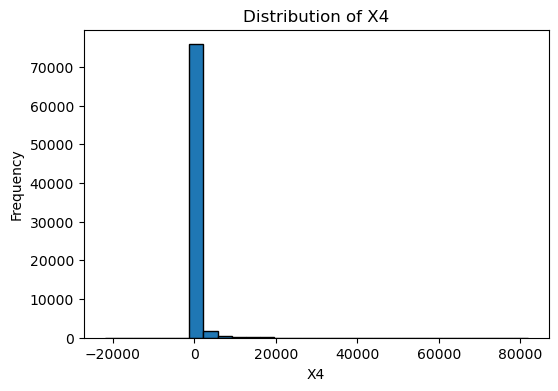

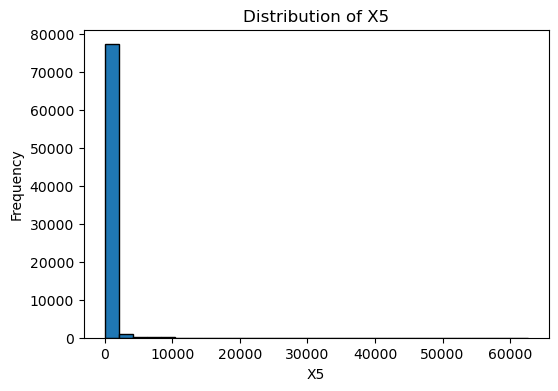

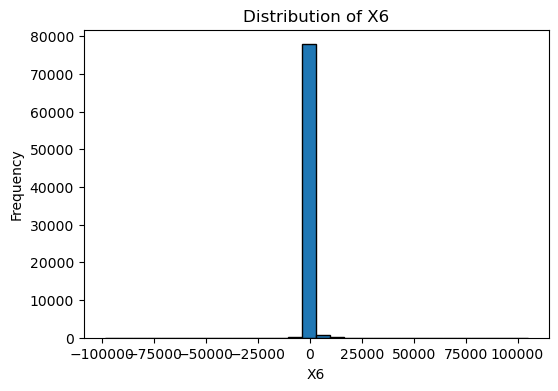

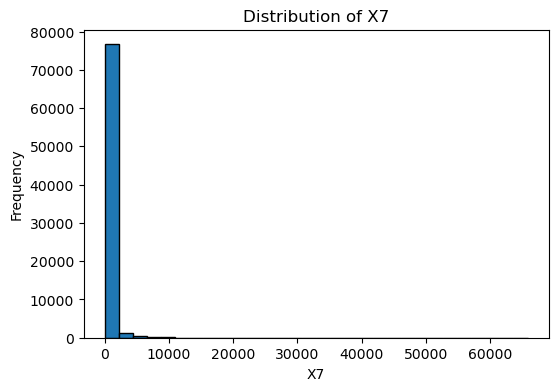

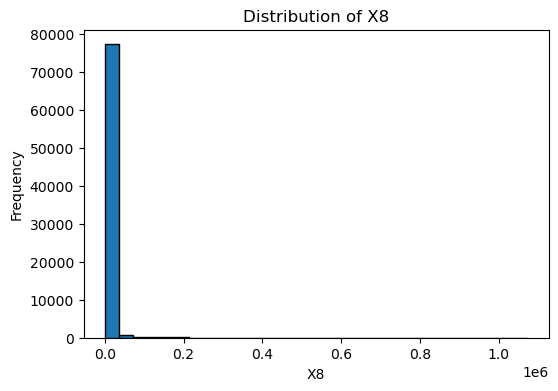

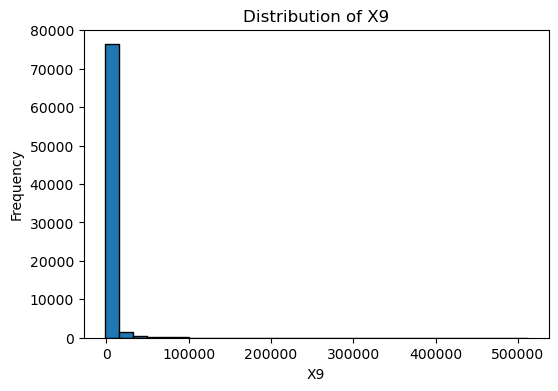

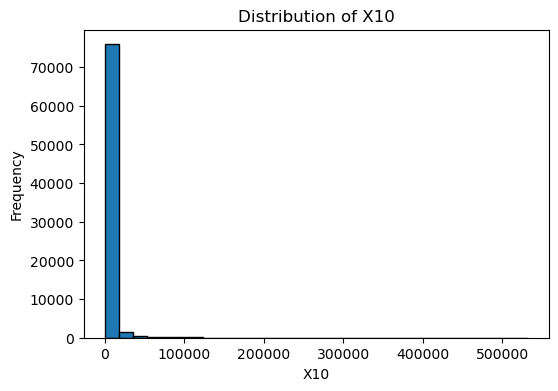

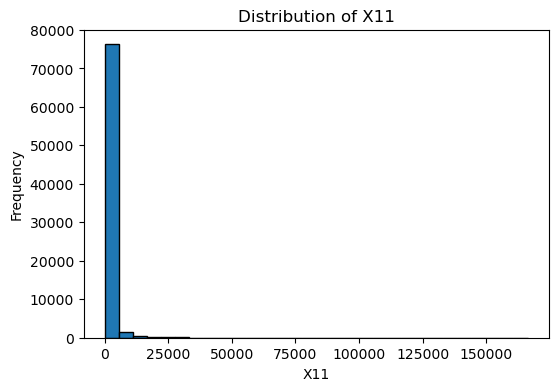

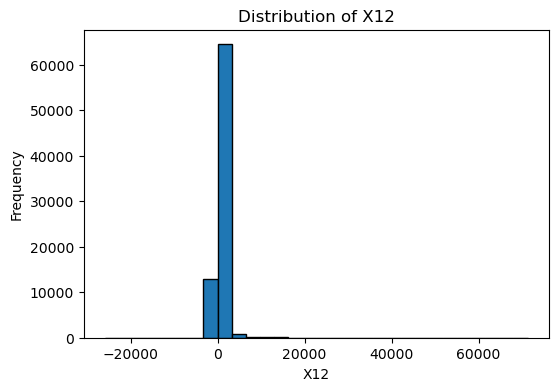

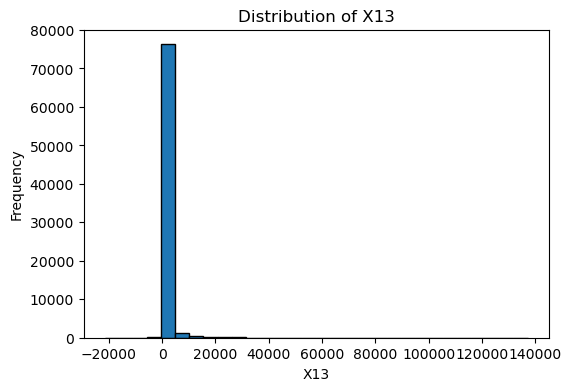

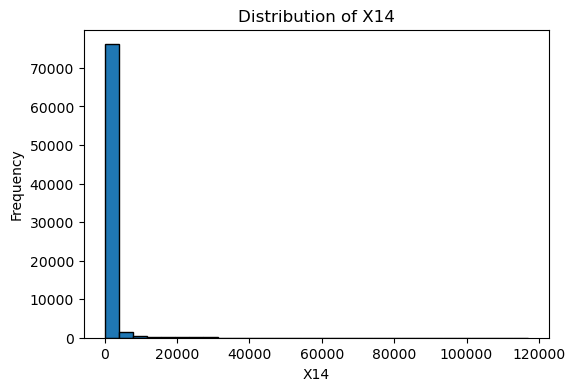

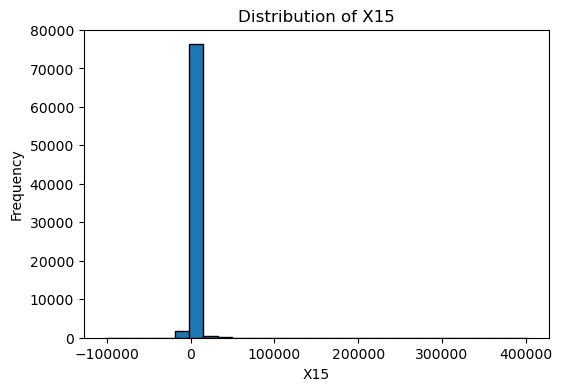

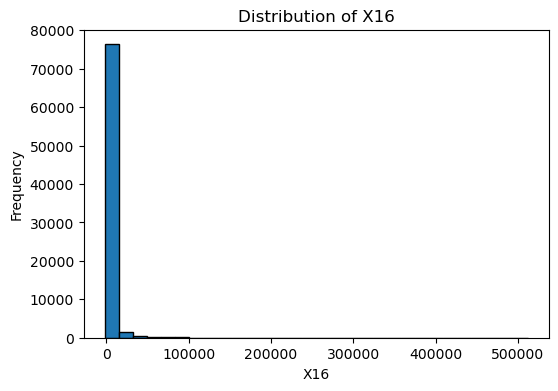

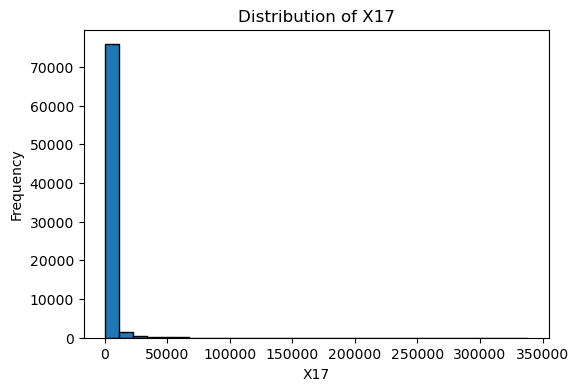

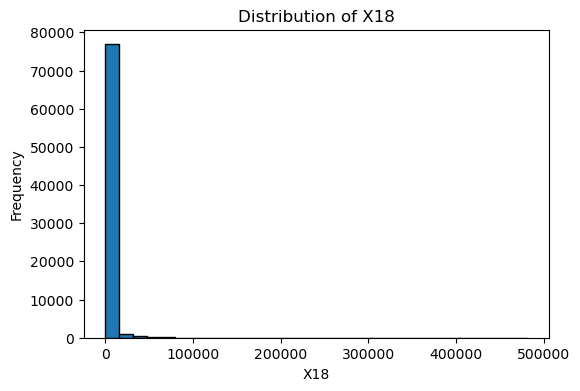

In [9]:
# Plot histograms for each numeric column
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col].dropna(), bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


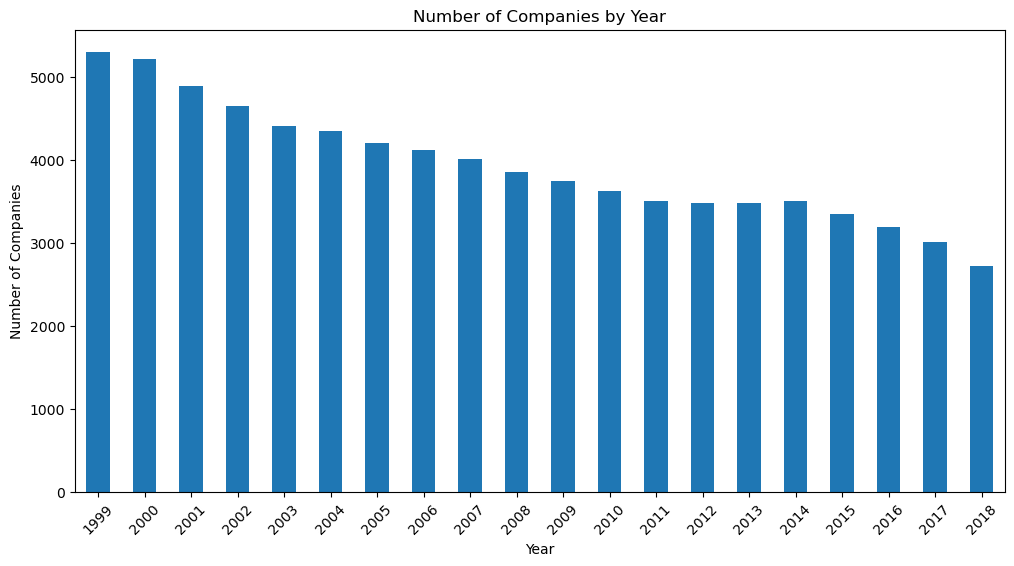

In [9]:
# Plot the number of companies in each year
import matplotlib.pyplot as plt

# Count the number of unique companies for each year
companies_by_year = df.groupby('year')['company_name'].nunique()

# Plot the results using a bar plot
plt.figure(figsize=(12, 6))
companies_by_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Companies')
plt.title('Number of Companies by Year')
plt.xticks(rotation=45)
plt.show()

Number of left-censored companies (first year is 1999): 5308


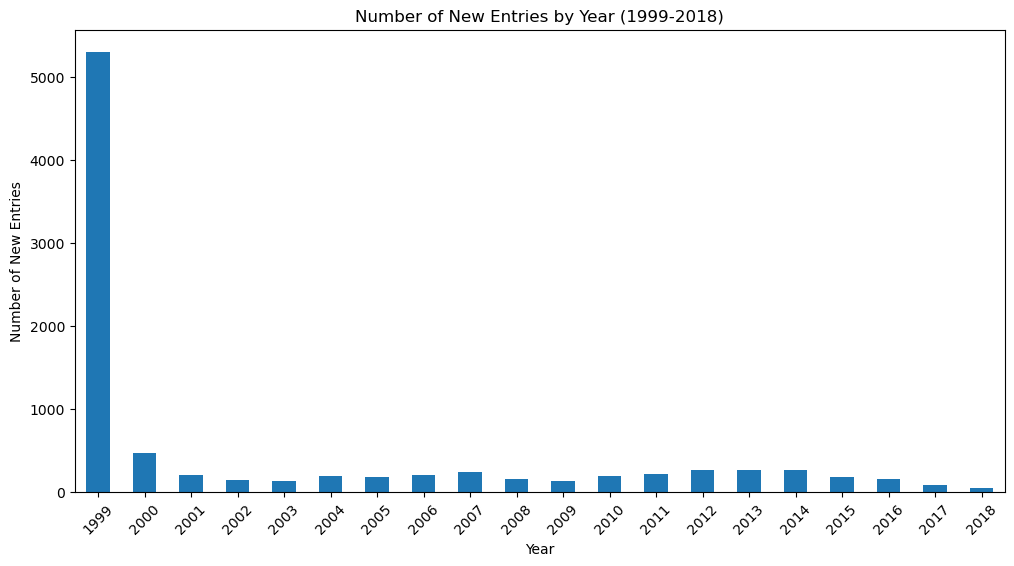

In [10]:
# Identify the first year each company appears in the dataset

# Plot the count of the first year each company appears in the dataset
first_year = df.groupby('company_name')['year'].min().reset_index()
first_year.columns = ['company_name', 'first_year']

# Filter the DataFrame to include only companies whose first year is 1999
left_censored_companies = first_year[first_year['first_year'] == 1999]

# Count the number of left-censored companies
num_left_censored_companies = left_censored_companies['company_name'].nunique()

print("Number of left-censored companies (first year is 1999):", num_left_censored_companies)

# Filter the DataFrame to include only rows where the first year is 1999 or later
first_year_after_1999 = first_year[first_year['first_year'] >= 1999]

# Count the number of new entries for each year
new_entries_by_year = first_year_after_1999['first_year'].value_counts().sort_index()

# Plot the results using a bar plot
plt.figure(figsize=(12, 6))
new_entries_by_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of New Entries')
plt.title('Number of New Entries by Year (1999-2018)')
plt.xticks(rotation=45)
plt.show()

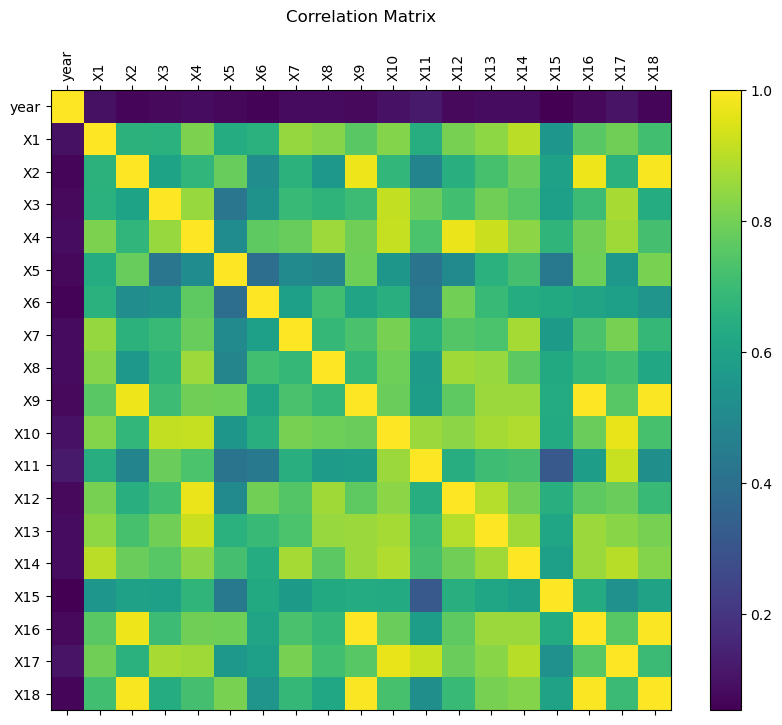

In [23]:
# Plot a correlation matrix for all numeric features
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
plt.matshow(corr_matrix, fignum=1)
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Matrix", pad=20)
plt.show()


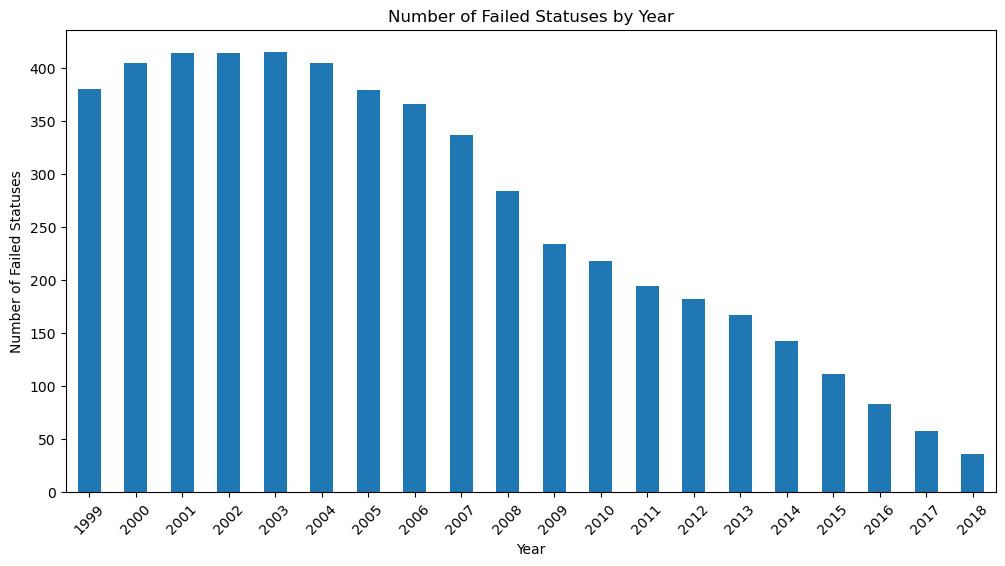

In [11]:
# Plot the 'failed' statuses by year

# Filter the DataFrame to include only rows where status_label is 'failed'
failed_df = df[df['status_label'] == 'failed']

# Count the number of 'failed' statuses for each year
failed_by_year = failed_df['year'].value_counts().sort_index()

# Plot the results using a bar plot
plt.figure(figsize=(12, 6))
failed_by_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Failed Statuses')
plt.title('Number of Failed Statuses by Year')
plt.xticks(rotation=45)
plt.show()

In [12]:
# Check for multiple failed statuses for each company
# Filter the DataFrame to include only rows where status_label is 'failed'
failed_df = df[df['status_label'] == 'failed']

# Group by company_name and count the number of occurrences of 'failed' status for each company
failed_counts = failed_df.groupby('company_name').size()

# Filter to include only companies with more than one 'failed' status
companies_with_multiple_failures = failed_counts[failed_counts > 1]

# Count the number of such companies
num_companies_with_multiple_failures = companies_with_multiple_failures.count()

print("Number of companies with more than one 'failed' status:", num_companies_with_multiple_failures)

Number of companies with more than one 'failed' status: 599


In [13]:
# Find the maximum count of 'failed' statuses for any company
# Filter the DataFrame to include only rows where status_label is 
# 'failed'
failed_df = df[df['status_label'] == 'failed']

# Group by company_name and count the number of 'failed' statuses for each company
failed_counts = failed_df.groupby('company_name').size()

# Find the maximum count of 'failed' statuses for any company
max_failed_count = failed_counts.max()

print("Maximum count of 'failed' statuses for any company:", max_failed_count)

Maximum count of 'failed' statuses for any company: 20


In [14]:
# How many observations would be lost if we removed all observations 
# for each company that occur after the first 'failed' status for that 
# company? 

# Sort the DataFrame by company_name and year
df = df.sort_values(by=['company_name', 'year'])

# Identify the first occurrence of 'failed' status for each company
first_failed = df[df['status_label'] == 'failed'].groupby('company_name')['year'].min().reset_index()
first_failed.columns = ['company_name', 'first_failed_year']

# Merge the first_failed DataFrame with the original DataFrame
df = df.merge(first_failed, on='company_name', how='left')

# Filter out observations that occur after the first 'failed' status for each company
observations_to_drop = df[(df['status_label'] == 'failed') & (df['year'] > df['first_failed_year'])]

# Count the number of observations that would be lost
num_observations_lost = observations_to_drop.shape[0]

print("Number of observations that would be lost:", num_observations_lost)

Number of observations that would be lost: 4611


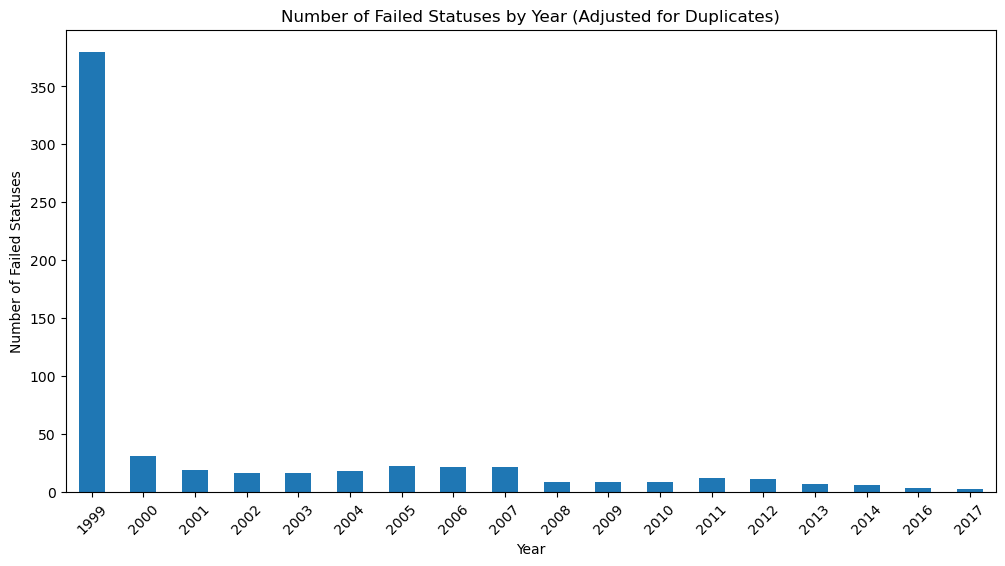

In [15]:
# Plot the failed companies by year using the first instance of 
# 'failed' year for each company

# Filter the DataFrame to include only rows where status_label is 'failed'
failed_df = df[df['status_label'] == 'failed']

# Remove duplicates by keeping only the first instance of 'failed' status for each company
failed_df = failed_df.drop_duplicates(subset='company_name', keep='first')

# Count the number of 'failed' statuses for each year
failed_by_year = failed_df['year'].value_counts().sort_index()

# Plot the results using a bar plot
plt.figure(figsize=(12, 6))
failed_by_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Failed Statuses')
plt.title('Number of Failed Statuses by Year (Adjusted for Duplicates)')
plt.xticks(rotation=45)
plt.show()

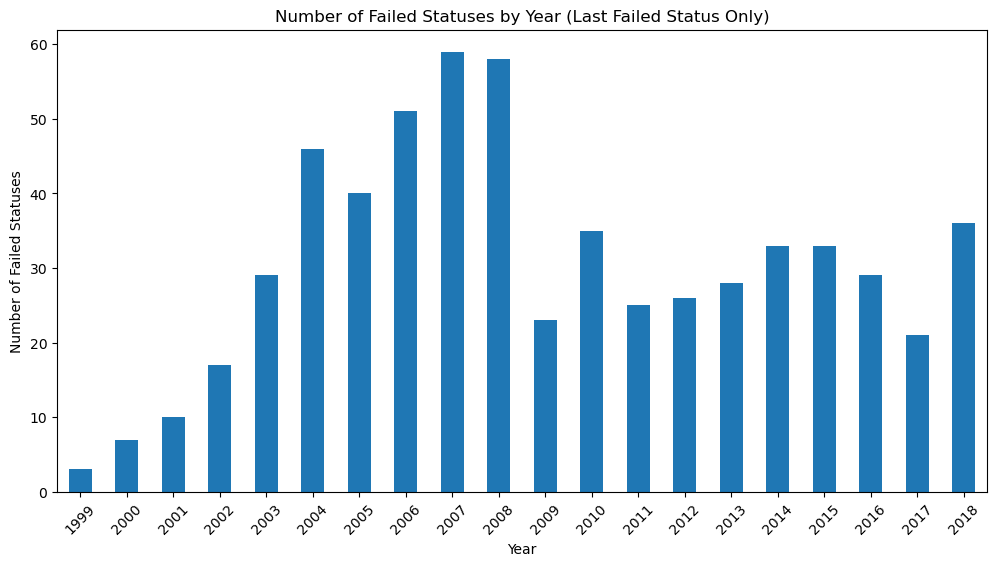

In [16]:
# Plot the failed companies by year using the last instance of
# 'failed' year for each company

# Filter the DataFrame to include only rows where status_label is 'failed'
failed_df_original = df[df['status_label'] == 'failed']

# Remove duplicates by keeping only the last instance of 'failed' status for each company
failed_df_last = failed_df_original.drop_duplicates(subset='company_name', keep='last')

# Count the number of 'failed' statuses for each year
failed_by_year_last = failed_df_last['year'].value_counts().sort_index()

# Plot the results using a bar plot
plt.figure(figsize=(12, 6))
failed_by_year_last.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Failed Statuses')
plt.title('Number of Failed Statuses by Year (Last Failed Status Only)')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Check on the total number of 'failed' statuses (original and 
# adjusted): should 5220 - 609 (= 4611) 
# Filter the DataFrame to include only rows where status_label is 'failed'
failed_df_original = df[df['status_label'] == 'failed']

# Count the total number of 'failed' statuses (original)
total_failed_original = failed_df_original.shape[0]

# Remove duplicates by keeping only the first instance of 'failed' status for each company
failed_df_first = failed_df_original.drop_duplicates(subset='company_name', keep='first')

# Count the total number of 'failed' statuses (first instance)
total_failed_first = failed_df_first.shape[0]

# Remove duplicates by keeping only the last instance of 'failed' status for each company
failed_df_last = failed_df_original.drop_duplicates(subset='company_name', keep='last')

# Count the total number of 'failed' statuses (last instance)
total_failed_last = failed_df_last.shape[0]

# Print the total counts
print("Total count of 'failed' statuses (original):", total_failed_original)
print("Total count of 'failed' statuses (first instance):", total_failed_first)
print("Total count of 'failed' statuses (last instance):", total_failed_last)

Total count of 'failed' statuses (original): 5220
Total count of 'failed' statuses (first instance): 609
Total count of 'failed' statuses (last instance): 609


In [18]:
# Check if there are any companies with 'alive' status after any
# 'failed' status
# Identify companies with at least one 'failed' status
companies_with_failed = df[df['status_label'] == 'failed']['company_name'].unique()

# Filter the DataFrame to include only these companies and sort by company_name and year
filtered_df = df[df['company_name'].isin(companies_with_failed)].sort_values(by=['company_name', 'year'])

# Count companies with 'alive' status after any 'failed' status
num_companies_with_alive_after_failed = sum(
    any((row['status_label'] == 'alive') and (row['year'] > failed_year)
        for _, row in company_df.iterrows())
    for company, company_df in filtered_df.groupby('company_name')
)

# Print the count
print("Number of companies with 'alive' status after any 'failed' status:", num_companies_with_alive_after_failed)

Number of companies with 'alive' status after any 'failed' status: 0



=== DESCRIPTIVE STATS BY STATUS (NUMERIC COLUMNS) ===


year                                                     \
                   count       mean    std        min        25%        50%   
status_label                                                                  
alive        73,462.0000 2,007.6339 5.7824 1,999.0000 2,002.0000 2,007.0000   
failed        5,220.0000 2,005.7109 4.8059 1,999.0000 2,002.0000 2,005.0000   

                                            X1                              \
                    75%        max       count     mean        std     min   
status_label                                                                 
alive        2,013.0000 2,018.0000 73,462.0000 914.5426 4,052.0479 -7.7600   
failed       2,009.0000 2,018.0000  5,220.0000 399.3394 1,147.8373  0.0010   

                                                             X2             \
                 25%      50%      75%          max       count       mean   
status_label                                                                 
alive        19.2353 102.9175 450.0417 169,662.0000 73,462.0000 1,646.9826   
failed       15.3158  75.8715 269.1135  16,548.0000  5,220.0000   856.3410   

                                                                          \
                    std       min     25%      50%      75%          max   
status_label                                                               
alive        9,210.5876 -366.6450 17.0135 103.5340 652.4688 374,623.0000   
failed       2,767.9132   -0.6660 17.2515 106.6385 468.8455  40,683.0000   

                      X3                                                 \
                   count     mean      std    min    25%    50%     75%   
status_label                                                              
alive        73,462.0000 123.7464 671.2821 0.0000 1.1852 7.9350 48.0018   
failed        5,220.0000  85.8809 268.5268 0.0000 1.3148 7.8465 47.4420   

                                  X4                                           \
                     max       count     mean        std          min     25%   
status_label                                                                    
alive        28,430.0000 73,462.0000 393.6846 2,076.6015 -21,913.0000 -0.6580   
failed        5,475.0000  5,220.0000 138.5686   521.2846  -5,062.0000 -4.2415   

                                                   X5                      \
                 50%      75%         max       count     mean        std   
status_label                                                                
alive        15.6180 144.6790 81,730.0000 73,462.0000 208.5601 1,089.9181   
failed        7.7900  85.7000  6,136.0000  5,220.0000 103.7354   482.3689   

                                                               X6           \
                min    25%    50%     75%         max       count     mean   
status_label                                                                 
alive        0.0000 0.0000 7.1170 76.7878 62,567.0000 73,462.0000 141.9947   
failed       0.0000 0.0767 6.1710 52.0335  9,963.0000  5,220.0000 -48.1123   

                                                                            \
                    std          min      25%     50%     75%          max   
status_label                                                                 
alive        1,299.2596 -98,696.0000  -6.4848  2.0715 43.4440 104,821.0000   
failed         592.0509 -27,446.0000 -26.0388 -3.3270  9.2032   5,996.4170   

                      X7                                                      \
                   count     mean        std     min    25%     50%      75%   
status_label                                                                   
alive        73,462.0000 297.7945 1,377.3966 -0.0060 3.3730 23.4540 136.1015   
failed        5,220.0000 132.5653   421.6916  0.0000 2.2418 15.2180  79.7083   

                                  X8                                        \
                     max       c

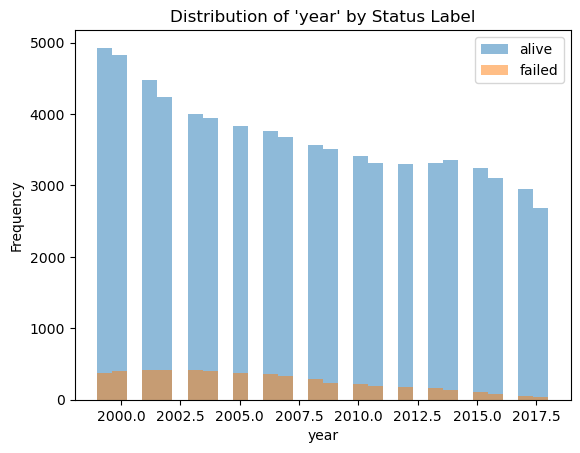

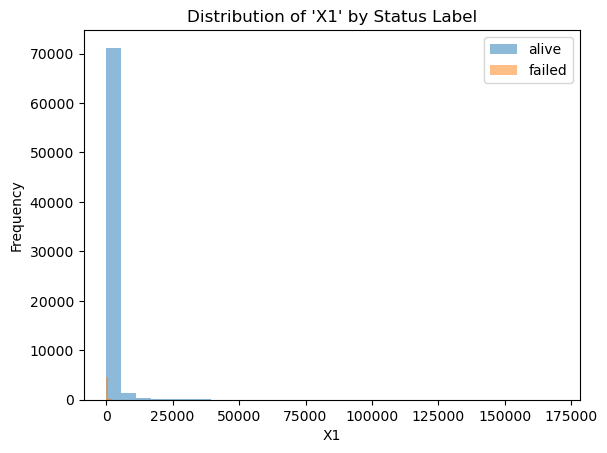

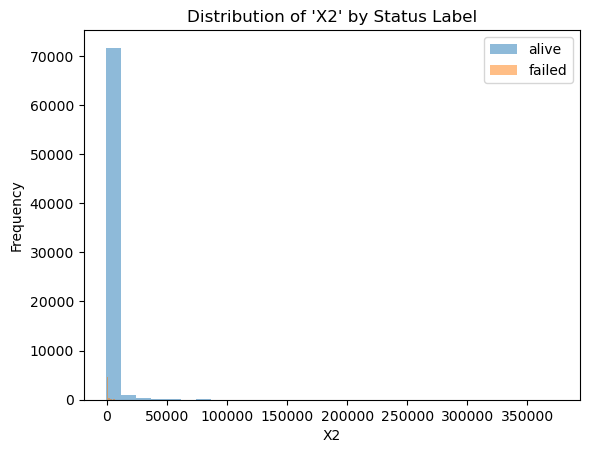

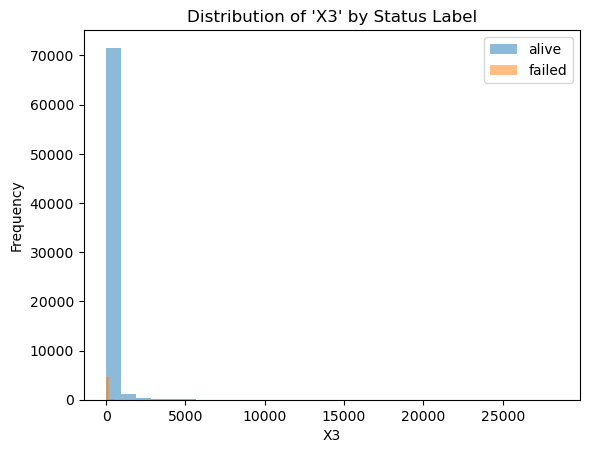

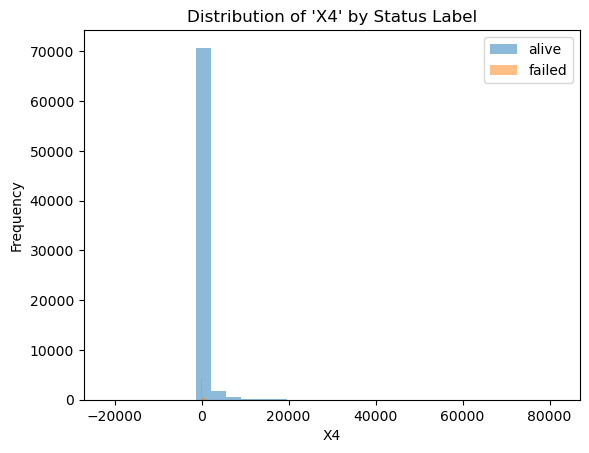

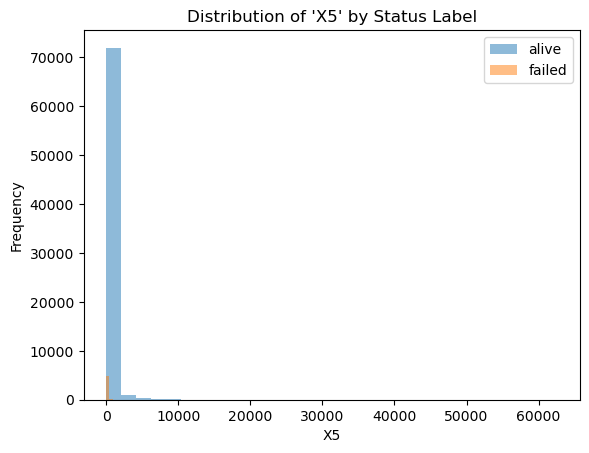

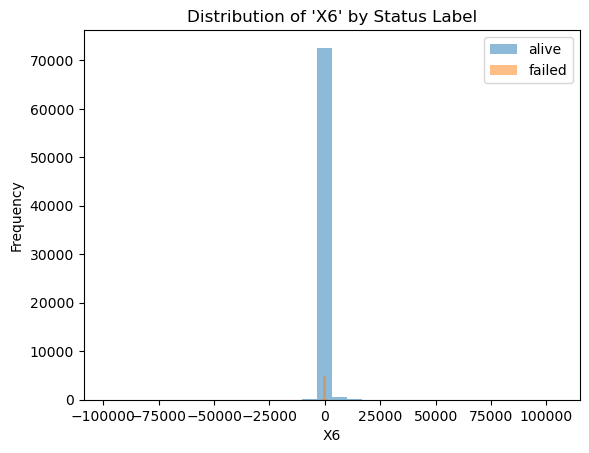

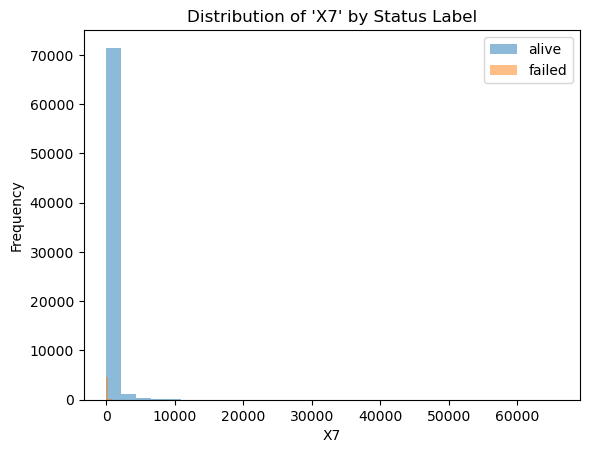

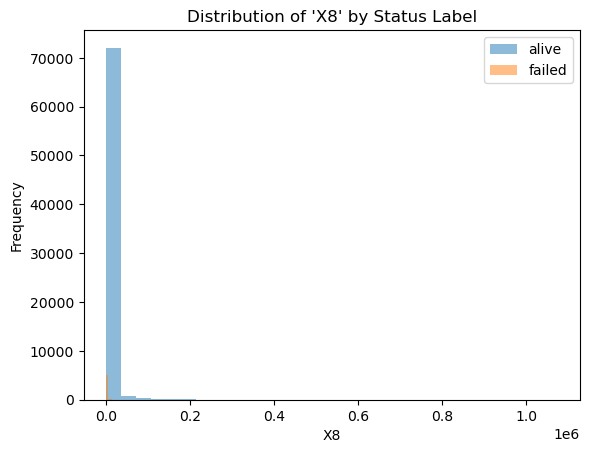

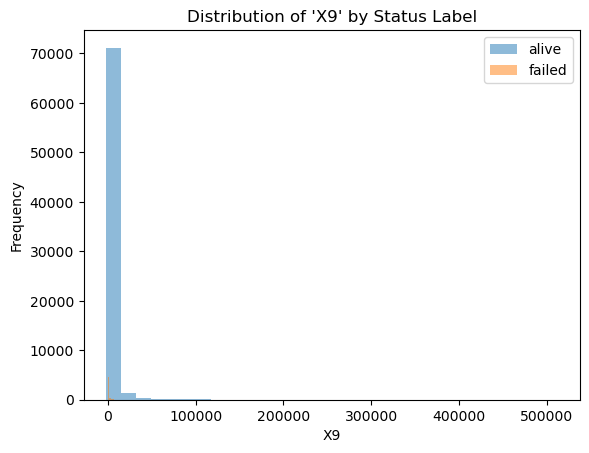

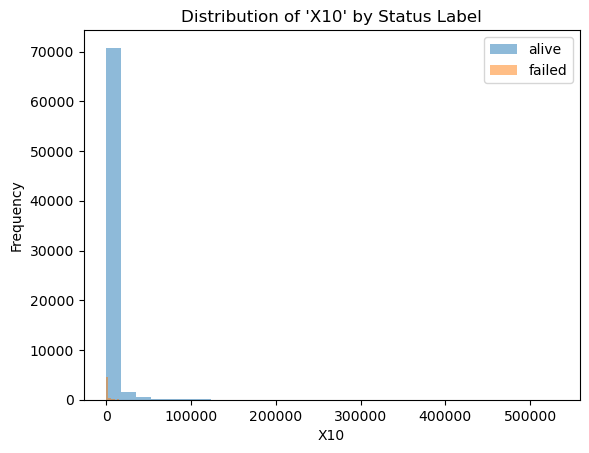

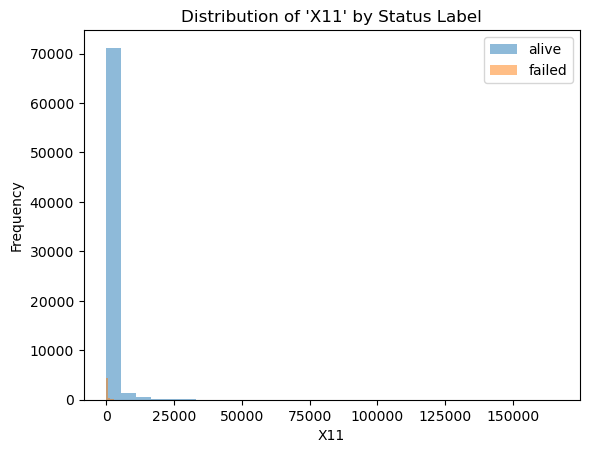

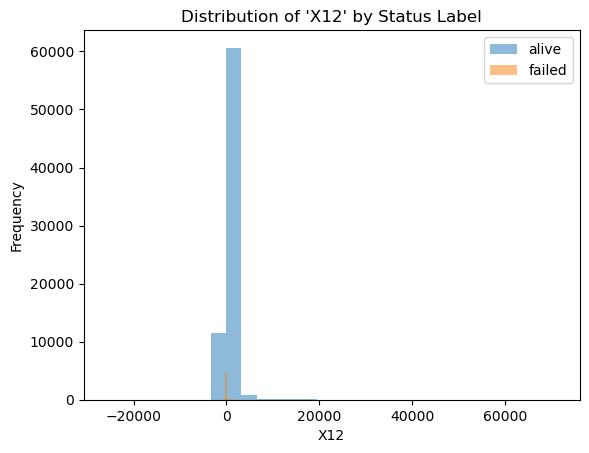

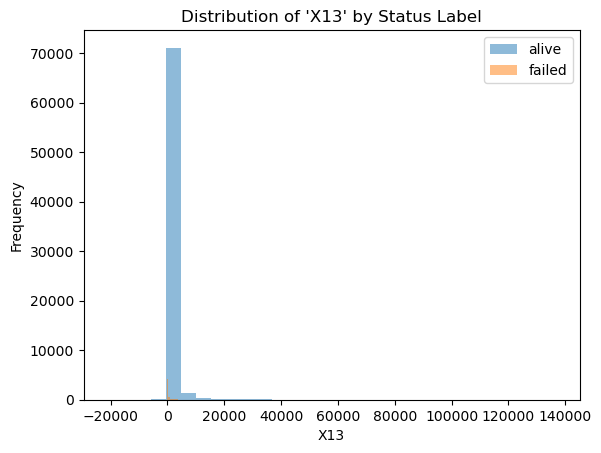

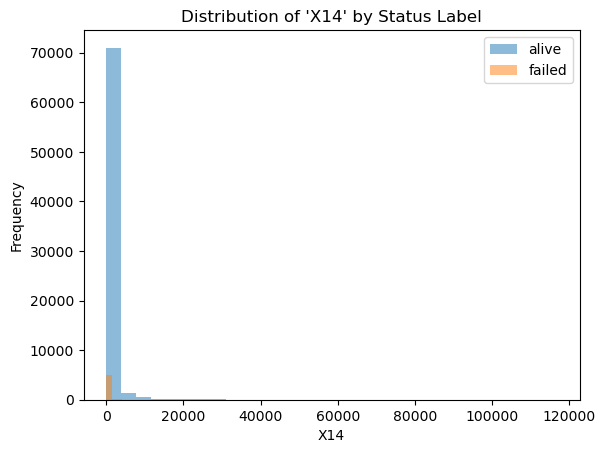

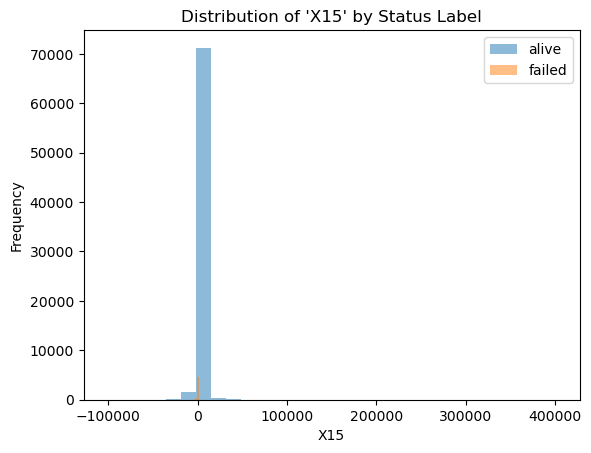

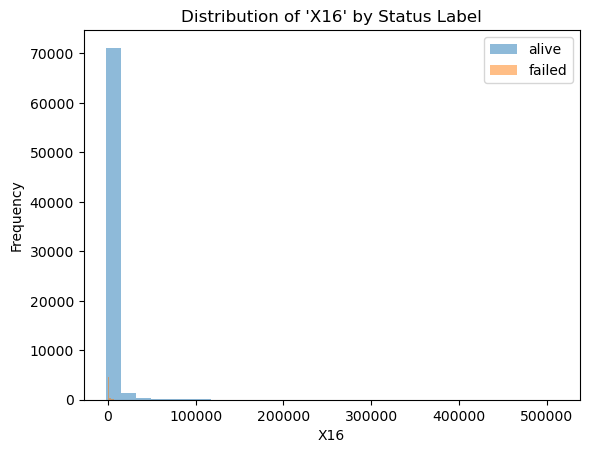

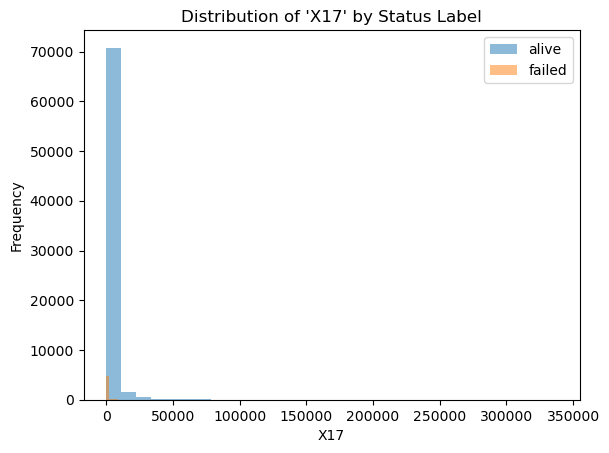

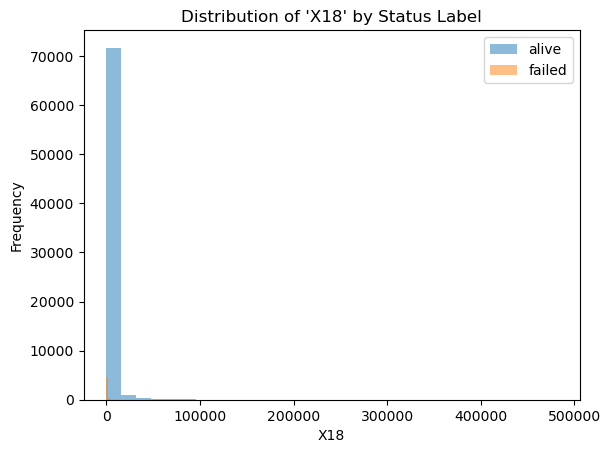


=== COUNTS OF STATUS BY YEAR ===


status_label,alive,failed
year,,
1999,4928,380
2000,4822,404
2001,4483,414
2002,4237,414
2003,4002,415
2004,3944,404
2005,3826,379
2006,3762,366
2007,3673,336


<Figure size 1000x600 with 0 Axes>

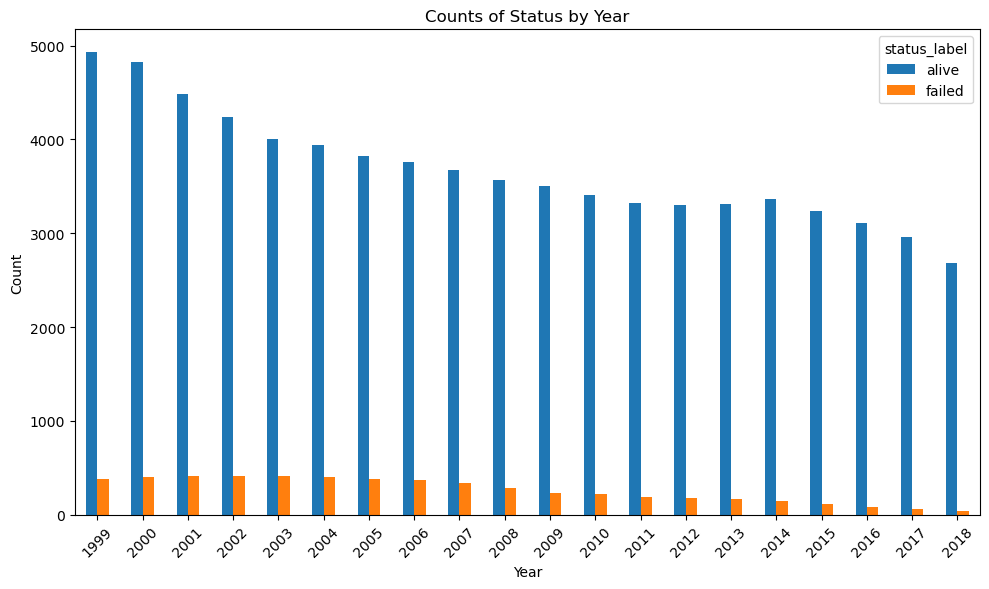


=== FAILURE RATE BY YEAR (Unique Companies) ===


,total_companies,failed_companies,fail_rate
year,,,
1999,5308,380,0.0716
2000,5226,404,0.0773
2001,4897,414,0.0845
2002,4651,414,0.0890
2003,4417,415,0.0940
2004,4348,404,0.0929
2005,4205,379,0.0901
2006,4128,366,0.0887
2007,4009,336,0.0838


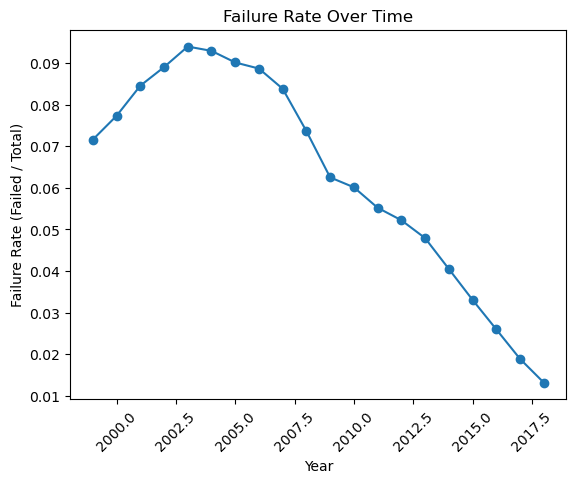


=== CORRELATION WITH FAILURE (1=Failed, 0=Alive) ===
year: -0.083
X6: -0.037
X8: -0.037
X12: -0.036
X1: -0.033
X4: -0.032
X13: -0.031
X7: -0.031
X15: -0.029
X9: -0.026
X16: -0.026
X10: -0.025
X5: -0.025
X18: -0.024
X14: -0.024
X2: -0.022
X17: -0.017
X3: -0.014
X11: -0.009

No duplicate (company_name, year) rows found.


In [ ]:
# -------------------------------------------------------------------
# ADDITIONAL EXPLORATORY DATA ANALYSIS (EDA) IDEAS
# -------------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Compare Numeric Features by Status (Alive vs Failed)
#    ----------------------------------------------------
#    This will help you see how each financial metric differs
#    on average between companies that are 'alive' vs 'failed'.
numeric_cols = df.select_dtypes(include=np.number).columns
if 'status_label' in df.columns:
    print("\n=== DESCRIPTIVE STATS BY STATUS (NUMERIC COLUMNS) ===")
    display(df.groupby('status_label')[numeric_cols].describe())

# 2. Visualize Numeric Columns Grouped by Status
#    -------------------------------------------
#    Plot histograms or boxplots side by side for numeric features,
#    separated by 'alive' vs 'failed'. This can highlight differences
#    in distributions more clearly.
if 'status_label' in df.columns:
    statuses = df['status_label'].unique()
    for col in numeric_cols:
        plt.figure()
        for status in statuses:
            subset = df[df['status_label'] == status]
            plt.hist(subset[col].dropna(), bins=30, alpha=0.5, label=status)
        plt.title(f"Distribution of '{col}' by Status Label")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.legend()
        plt.show()

# 3. Crosstab / Pivot Table of Status by Year
#    -----------------------------------------
#    This shows how many companies are labeled 'alive' or 'failed' each year.
if 'year' in df.columns and 'status_label' in df.columns:
    print("\n=== COUNTS OF STATUS BY YEAR ===")
    status_year_ct = pd.crosstab(df['year'], df['status_label'])
    display(status_year_ct)

    # Plot a grouped bar chart of alive vs failed by year
    plt.figure(figsize=(10, 6))
    status_year_ct.plot(kind='bar', stacked=False, figsize=(10,6))
    plt.title("Counts of Status by Year")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 4. Failure Rate Over Time
#    -----------------------
#    If each row is a single company-year observation, see how
#    the fraction of companies that 'failed' changes over time.
if 'year' in df.columns and 'company_name' in df.columns and 'status_label' in df.columns:
    # For each year, count unique companies and how many of them are 'failed'.
    companies_by_year = df.groupby('year')['company_name'].nunique()
    failed_by_year = df[df['status_label'] == 'failed'].groupby('year')['company_name'].nunique()

    # Combine into a single DataFrame
    failure_rate_df = pd.DataFrame({
        'total_companies': companies_by_year,
        'failed_companies': failed_by_year
    }).fillna(0)
    failure_rate_df['fail_rate'] = failure_rate_df['failed_companies'] / failure_rate_df['total_companies']

    print("\n=== FAILURE RATE BY YEAR (Unique Companies) ===")
    display(failure_rate_df)

    # Plot the failure rate over time
    plt.figure()
    plt.plot(failure_rate_df.index, failure_rate_df['fail_rate'], marker='o')
    plt.title("Failure Rate Over Time")
    plt.xlabel("Year")
    plt.ylabel("Failure Rate (Failed / Total)")
    plt.xticks(rotation=45)
    plt.show()

# 5. Correlation of Numeric Features with Failure (Binary)
#    ------------------------------------------------------
#    recode 'failed' = 1, 'alive' = 0, then see
#    how numeric features correlate with that binary outcome.
if 'status_label' in df.columns:
    df['failed_binary'] = df['status_label'].map({'failed': 1, 'alive': 0})
    if df['failed_binary'].notnull().any() and len(numeric_cols) > 0:
        corr_list = {}
        for col in numeric_cols:
            if df[col].dtype in [np.float64, np.int64]:
                # Drop NaNs for correlation
                valid_mask = df[col].notnull() & df['failed_binary'].notnull()
                if valid_mask.sum() > 1:
                    corr_value = np.corrcoef(df.loc[valid_mask, col], df.loc[valid_mask, 'failed_binary'])[0,1]
                    corr_list[col] = corr_value

        # Sort by absolute correlation with 'failed_binary'
        sorted_corr = dict(sorted(corr_list.items(), key=lambda x: abs(x[1]), reverse=True))
        print("\n=== CORRELATION WITH FAILURE (1=Failed, 0=Alive) ===")
        for feature, cval in sorted_corr.items():
            print(f"{feature}: {cval:.3f}")

# 6. Check for Any Duplicate (Company, Year) Pairs
#    ---------------------------------------------
#    Ideally, each (company_name, year) should be unique. 
if 'company_name' in df.columns and 'year' in df.columns:
    duplicates = df.duplicated(subset=['company_name','year'], keep=False)
    if duplicates.any():
        print("\n=== DUPLICATE (COMPANY, YEAR) ROWS FOUND ===")
        display(df[duplicates].sort_values(['company_name','year']))
    else:
        print("\nNo duplicate (company_name, year) rows found.")
